In [4]:
import sys
sys.path.append('..')

from baseline.utilities import *

TARGET = 'UHI Index'
X = pd.read_parquet('../pipeline/data/processed/train/X_selected.parquet')
y = pd.read_parquet('../pipeline/data/processed/train/y_selected.parquet')[TARGET]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, 
                                                    shuffle=True, 
                                                    random_state=SEED
                                                    )
test_file = pd.read_parquet('../pipeline/data/processed/submission/submission_data.parquet')

# * Load Model
model = joblib.load('../pipeline/models/stacking.pkl')
sc = joblib.load('../pipeline/models/scaler.pkl')

model

StackingRegressor(estimators=[('et',
                               ExtraTreesRegressor(max_features=None,
                                                   n_estimators=200, n_jobs=-2,
                                                   random_state=42)),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=0.5, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, g...
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=20,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=-2,
                                            num_parallel_tree=None,
                                            random_state=42, ...))],
                  final_estimator=ElasticNetCV(cv=10, n_jobs=-2,
                                               random_state=42),
                  verbose=2)

Generating SHAP values for ExtraTrees...


 97%|=================== | 4834/5000 [00:23<00:00]       

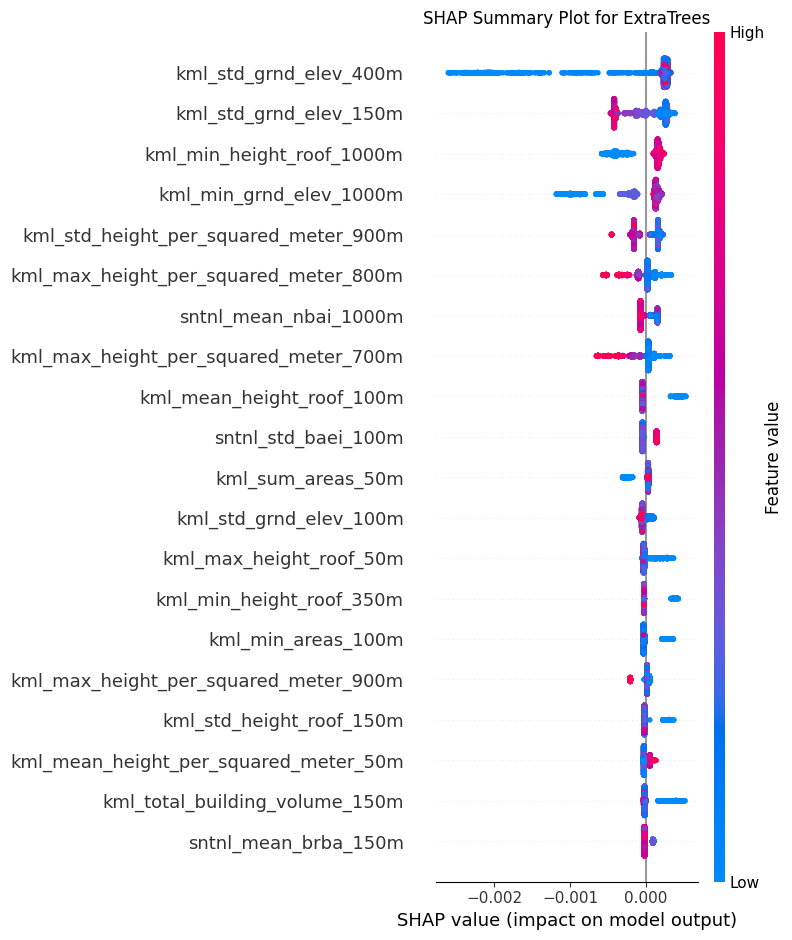

Generating SHAP values for XGBoost...


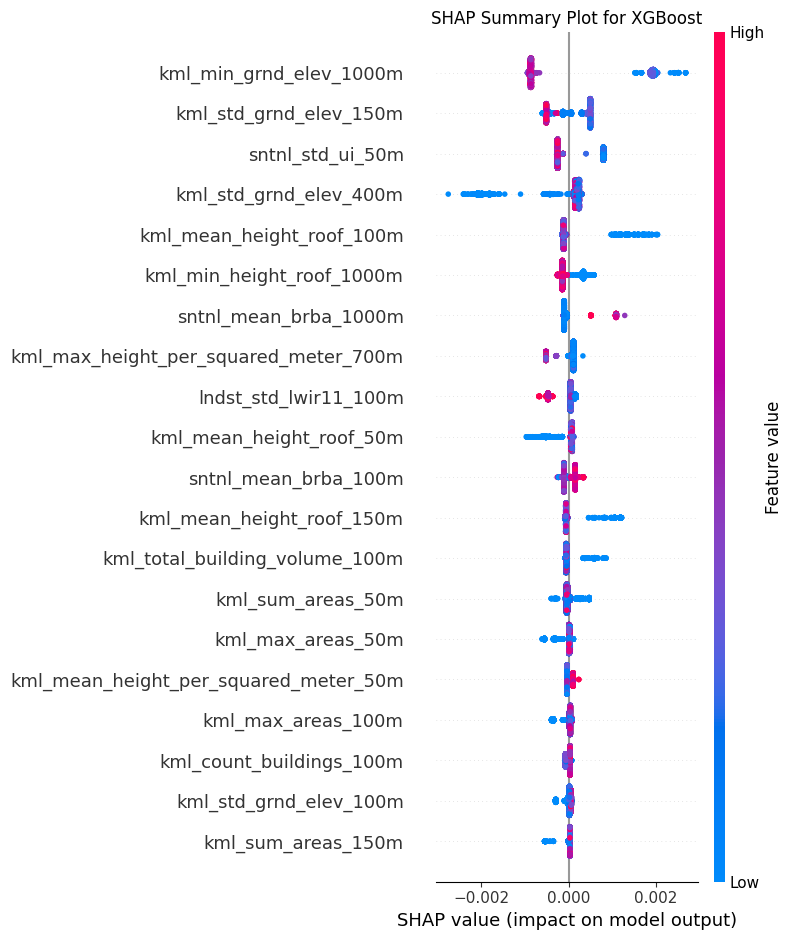

In [5]:
import shap
import matplotlib.pyplot as plt

# Load individual models
extratrees_model = model.estimators_[0]
xgb_model = model.estimators_[1]

X_sample = X_train.sample(5000, random_state=SEED)

# Ensure SHAP values can be computed
for model, name in [(extratrees_model, "ExtraTrees"), (xgb_model, "XGBoost")]:
    print(f"Generating SHAP values for {name}...")
    explainer = shap.Explainer(model, X_sample)
    shap_values = explainer(X_sample)

    # Plot SHAP summary
    plt.title(f"SHAP Summary Plot for {name}")
    shap.summary_plot(shap_values, X_sample, show=False)
    plt.tight_layout()
    plt.show()
